# Made with ML

- https://github.com/GokuMohandas/Made-With-ML/blob/main/notebooks/madewithml.ipynb
- https://madewithml.com/

In [2]:
# import os
# import sys
# import time
# import numpy as np
# import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# from scipy import stats
# import warnings; warnings.filterwarnings('ignore')
# #plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
# %matplotlib inline

# 1. Design
## 1.1 Setup

깃 클로닝 하는 방법

```
export GITHUB_USERNAME="YOUR_GITHUB_UESRNAME"  # <-- CHANGE THIS to your username
git clone https://github.com/GokuMohandas/Made-With-ML.git .
git remote set-url origin https://github.com/$GITHUB_USERNAME/Made-With-ML.git
git checkout -b dev
export PYTHONPATH=$PYTHONPATH:$PWD  # so we can import modules from our scripts
```

패키지 설치

```
pip install -r requirements.txt
```

### Ray

우리는 ML 애플리케이션을 확장하고 프로덕션화하기 위해 Ray를 사용할 것입니다.   
Ray는 ML 워크로드 확장을 위한 라이브러리와 함께 핵심 분산 런타임으로 구성되어 있으며, OpenAI, Spotify, Netflix, Instacart, Doordash 등 많은 기업이 ML 애플리케이션을 개발하는 데 사용하고 있습니다.  
노트북 내부에서 Ray를 초기화하는 것부터 시작하겠습니다:

In [3]:
import ray

In [4]:
if ray.is_initialized():
    ray.shutdown()
ray.init()

2023-12-07 14:36:12,279	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.11
Ray version:,2.7.0
Dashboard:,http://127.0.0.1:8265


클러스터 리소스를 확인하여 사용 가능한 컴퓨팅 리소스를 볼 수도 있습니다:

In [5]:
ray.cluster_resources()

{'memory': 35647170151.0,
 'node:__internal_head__': 1.0,
 'node:127.0.0.1': 1.0,
 'CPU': 10.0,
 'object_store_memory': 2147483648.0}

GPU가 없는 로컬 노트북에서 실행하는 경우, ray.cluster_resources()의 CPU 수를 사용하여 리소스를 설정하세요.   

## 1.2 Product

### Overview

머신러닝 모델 개발을 시작하기 전에 먼저 동기를 부여하고 애플리케이션을 설계해야 합니다.  
이 과정은 기술적인 과정이지만, 이 초기 제품 설계 과정은 훌륭한 제품을 만드는 데 매우 중요합니다.  
이번 단원에서는 애플리케이션의 제품 설계 측면을, 다음 단원에서는 시스템 설계 측면을 중점적으로 살펴보겠습니다.

### Template

아래 템플릿은 머신러닝 제품 개발을 안내하기 위해 고안되었습니다. 여기에는 애플리케이션의 제품 및 시스템 설계(다음 단원) 측면이 모두 포함됩니다:

Product design (What & Why) → Systems design (How)

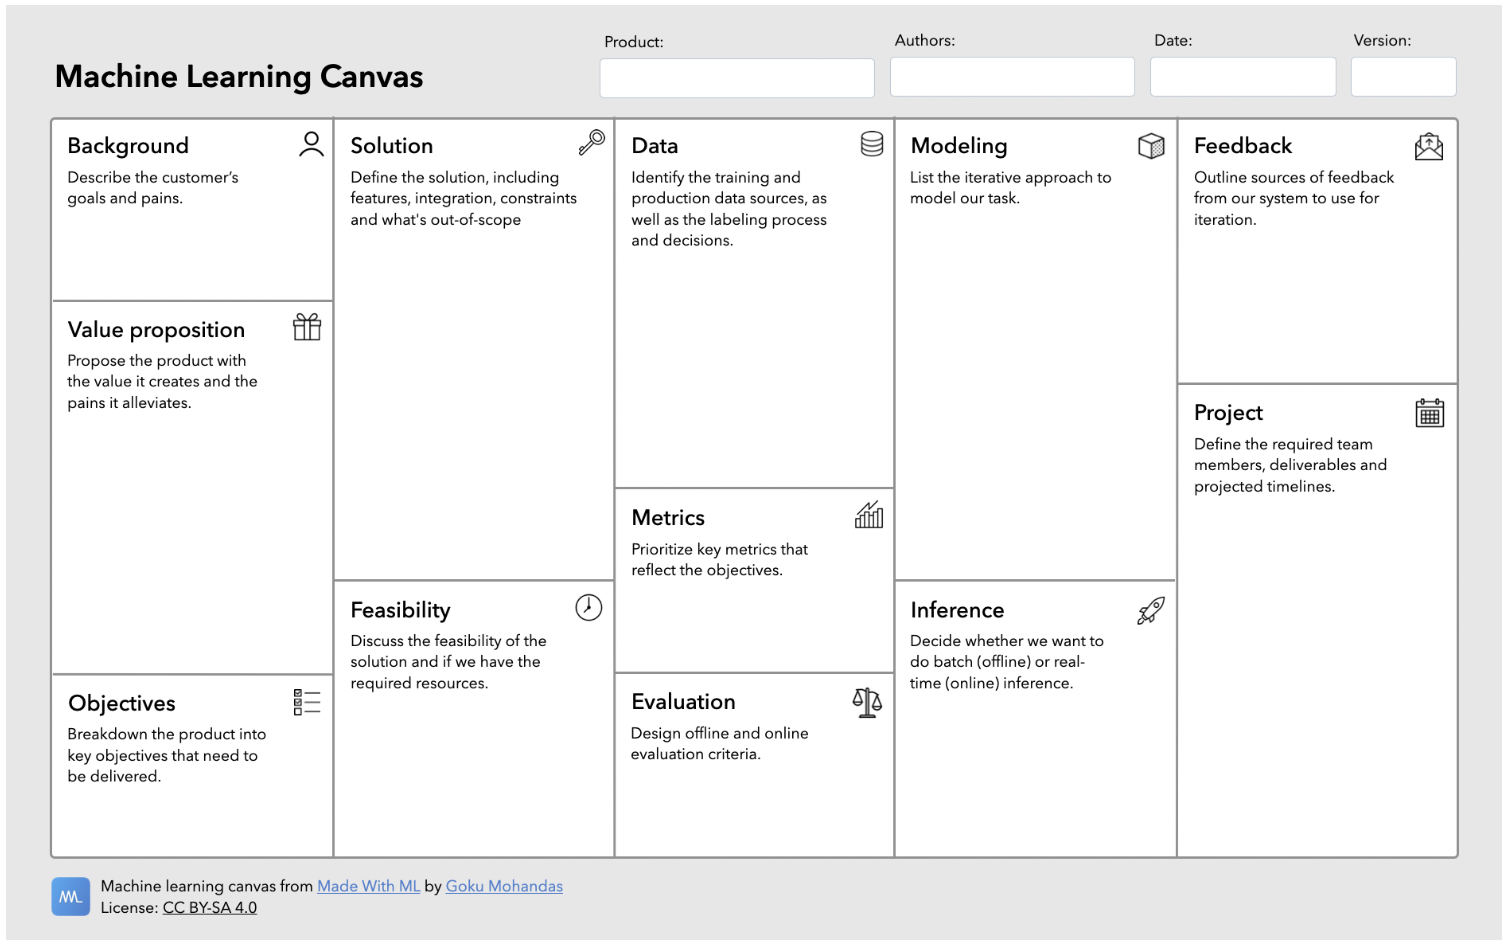

### Product design

제품의 필요성에 대한 동기를 부여하고 목표와 영향력을 설명합니다.

아래의 각 섹션에는 "우리의 과제"라는 부분이 있으며, 이 부분에서는 특정 주제가 우리가 구축할 애플리케이션과 어떤 관련이 있는지 설명합니다.

#### Background

사용자 중심의 접근 방식을 통해 달성하고자 하는 목표의 배경을 설정합니다:

- 사용자: 사용자의 프로필/페르소나
- 목표: 사용자의 주요 목표
- 어려움: 사용자의 목표 달성을 방해하는 장애물

우리의 과제:
- 사용자: 머신러닝 개발자 및 연구원.
- 목표: 업무, 지식 등을 위한 머신 러닝 콘텐츠에 대한 최신 정보를 유지합니다.
- 어려움: 인터넷에 라벨이 붙지 않은 콘텐츠가 너무 많이 흩어져 있음.

#### Value position

제품 중심 접근 방식을 통해 창출할 수 있는 가치를 제안하세요:

- 제품: 사용자가 목표를 달성하도록 돕기 위해 무엇을 만들어야 할까요?
- 완화: 제품이 어떻게 고통을 줄여줄 것인가?
- 장점: 제품이 어떻게 이득을 창출할 것인가?

우리의 과제:

머신러닝 개발자와 연구자가 최신 ML 콘텐츠를 확인할 수 있는 플랫폼을 구축할 것입니다.  
이를 위해 인기 있는 소스(Reddit, Twitter 등)에서 콘텐츠를 검색하고 분류하여 플랫폼에 표시할 것입니다.  
간단하게 설명하기 위해 인기 있는 소스의 ML 콘텐츠를 플랫폼으로 전달하는 파이프라인이 이미 있다고 가정해 보겠습니다.   우리는 콘텐츠를 정확하게 분류할 수 있는 ML 서비스를 개발하는 데만 집중할 것입니다.

- 제품: 인기 있는 소스에서 ML 콘텐츠를 검색하고 분류하는 서비스입니다.
- 완화: 사용자가 검색할 수 있도록 분류된 콘텐츠를 표시합니다.
- 장점: 사용자가 ML 콘텐츠에 대한 최신 정보를 얻기 위해 플랫폼을 방문했을 때, 시끄러운 인터넷에서 직접 콘텐츠를 검색하는 데 시간을 낭비하지 않아도 됩니다.

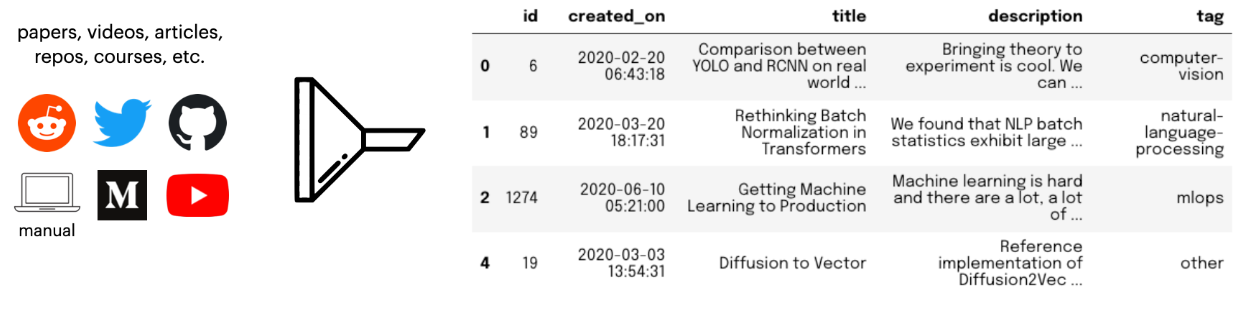

#### Objectives

Breakdown the product into key objectives that we want to focus on.

우리의 과제:

- 신뢰할 수 있는 소스에서 ML 콘텐츠를 발견하여 플랫폼으로 가져옵니다.
- 사용자가 쉽게 검색할 수 있도록 유입되는 콘텐츠를 분류합니다. [우리의 초점]
- 플랫폼에 분류된 콘텐츠 표시(최근, 인기, 추천 등)

#### Solution

목표를 달성하는 데 필요한 솔루션에 대해 설명합니다:

- 핵심 기능: 개발될 주요 기능.
- 통합: 제품이 다른 서비스와 어떻게 통합될 것인지 설명합니다.
- 대안: 고려해야 할 대체 솔루션.
- 제약: 우리가 알고 있어야 하는 제한 사항.
- 범위 외: 현재로서는 개발하지 않을 기능.

우리의 과제:

콘텐츠를 분류할 수 있는 모델을 개발하여 플랫폼에서 카테고리(태그)별로 정리할 수 있도록 합니다.  

핵심 기능:  

- 주어진 콘텐츠에 적합한 태그를 예측합니다. [우리의 초점]
- 잘못 분류된 콘텐츠에 대한 사용자 피드백 프로세스.
- 모델이 부정확하거나 확실하지 않은 ML 콘텐츠를 분류하기 위한 워크플로우.

통합:  
- 신뢰할 수 있는 출처의 ML 콘텐츠가 분류를 위해 저희 서비스로 전송됩니다.

대안:  
- 사용자가 콘텐츠를 수동으로 추가하고 분류할 수 있도록 허용(노이즈, 콜드 스타트 등)

제약 조건:  
- 수신 콘텐츠를 분류할 때 짧은 지연 시간(>100ms)을 유지해야 합니다. [지연 시간]
- 승인된 태그 목록에서 태그만 추천합니다. [보안]
- 중복 콘텐츠가 플랫폼에 추가되지 않도록 합니다. [UI/UX]

out-of-scope:  
- 승인된 태그 목록(자연어 처리, 컴퓨터 비전, mlops 등)을 벗어난 관련 태그를 식별합니다.
- 콘텐츠 링크의 전체 텍스트 HTML을 사용하여 분류에 도움을 줍니다.

#### Feasibility

솔루션의 실현 가능성은 어느 정도이며 솔루션 제공에 필요한 리소스(데이터, 비용, 팀 등)를 보유하고 있나요?

우리의 과제:

레이블이 지정된 ML 콘텐츠가 포함된 데이터 세트가 있습니다. 목표를 달성하는 데 필요한 신호가 있는지 평가해야 합니다.

## 1.3 Design

### Overview

이전 단원에서는 ML 애플리케이션을 위한 제품 설계 프로세스를 살펴보았습니다.  
이번 단원에서는 시스템 설계 프로세스를 다루면서 제품 목표를 달성할 수 있는 ML 시스템을 설계하는 방법을 배워보겠습니다.

### Template

Product design (What & Why) → Systems design (How)

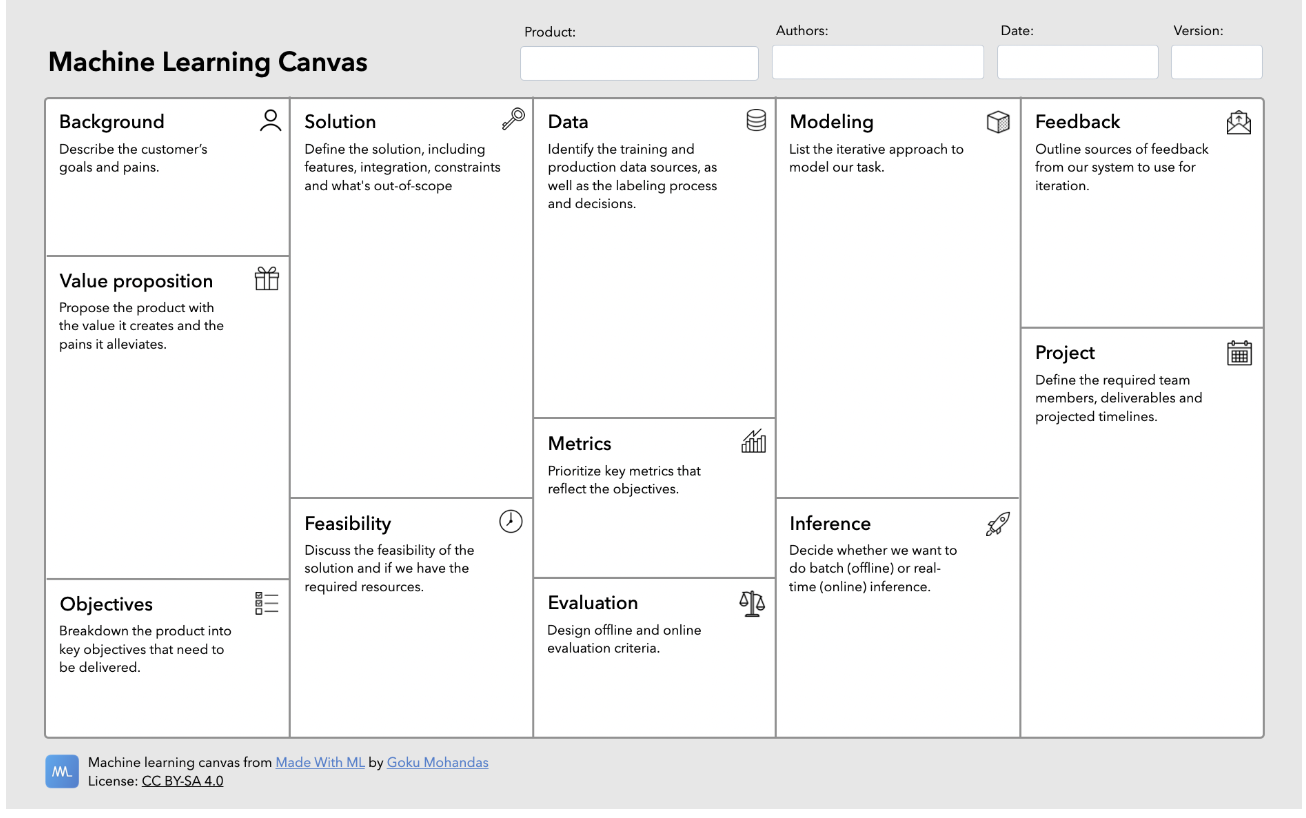

## System design

제품 구축을 위한 접근 방식을 어떻게 설계할 수 있을까요? 데이터 수집부터 모델 제공까지 모든 것을 고려해야 합니다.

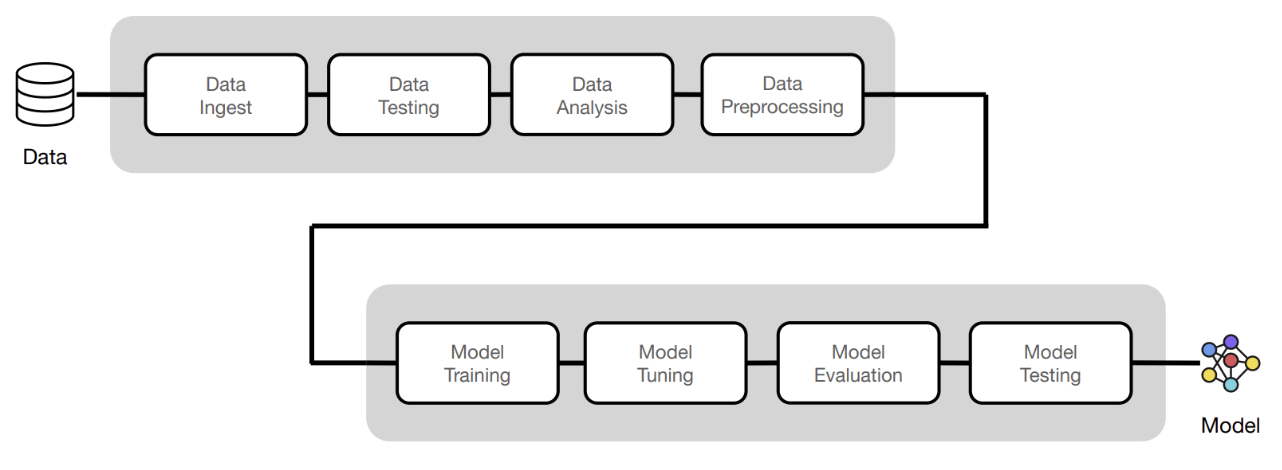

#### Data

데이터의 교육 및 생산(배치/스트림) 소스를 설명합니다.

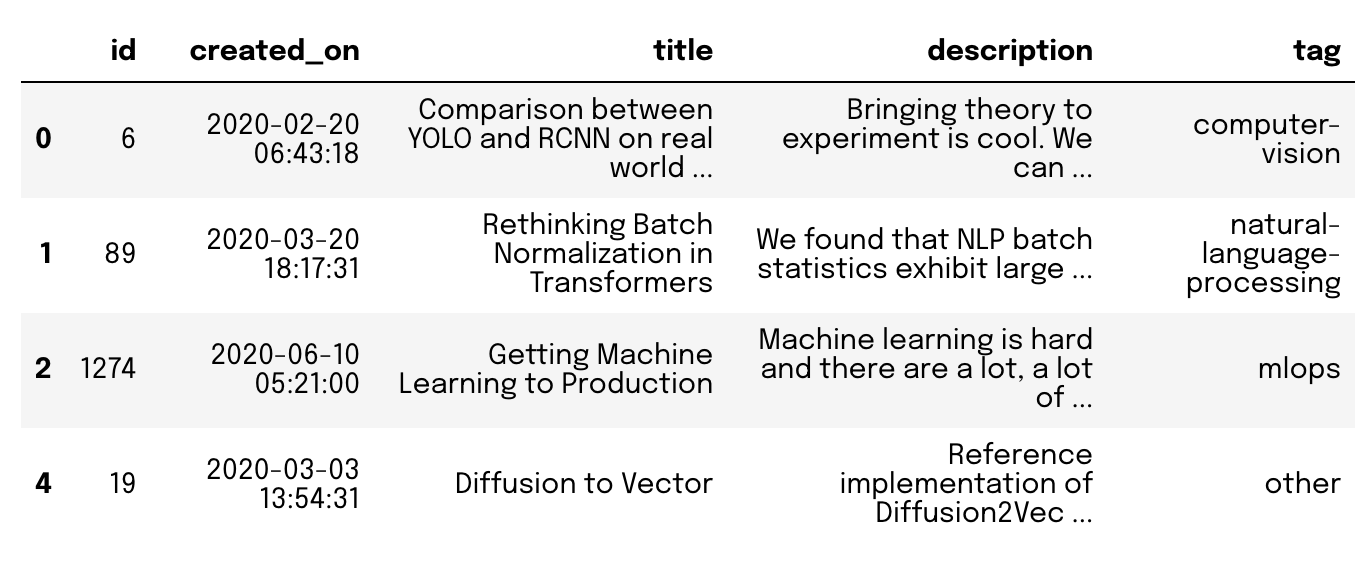

우리의 과제:

- 훈련:
    - 학습 데이터 및 테스트(홀드아웃) 데이터에 액세스합니다.
    - 이 데이터 세트를 생성하는 데 어떤 종류의 샘플링이 적용되었나요?
    - 데이터 유출이 발생하진 않았나요?
- 생산:
    - 다양한 소스의 일괄 처리 또는 실시간 ML 콘텐츠 스트림에 대한 액세스
    - 이 스트림에 과거에 본 것과 일치하는 데이터만 있다고 어떻게 신뢰할 수 있나요?

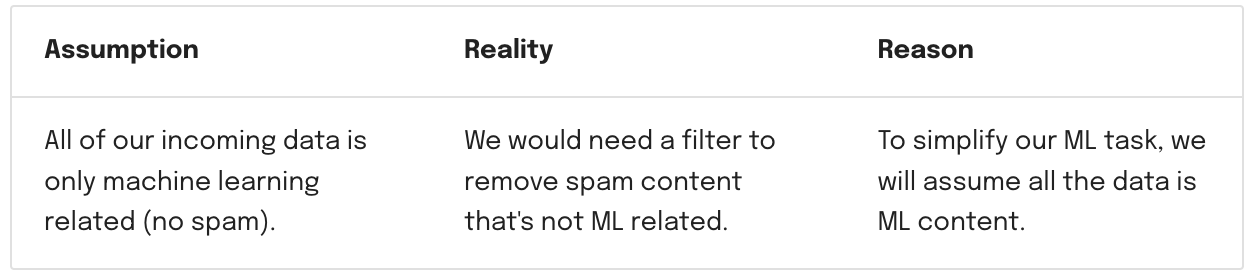

--- 생략

### Inference

만족스러운 모델이 완성되면 일괄(오프라인) 추론을 수행할지, 아니면 실시간(온라인) 추론을 수행할지 고민해야 합니다.

#### Batch inference

모델을 사용하여 유한한 입력 세트에 대한 일괄 예측을 수행한 다음, 지연 시간이 짧은 추론을 위해 데이터베이스에 기록할 수 있습니다.  
사용자 또는 다운스트림 서비스가 추론 요청을 하면 데이터베이스에 캐시된 결과가 반환됩니다.  
이 시나리오에서는 학습된 모델을 직접 로드하여 코드에서 추론에 사용할 수 있습니다.  
별도의 서비스로 제공할 필요가 없습니다.

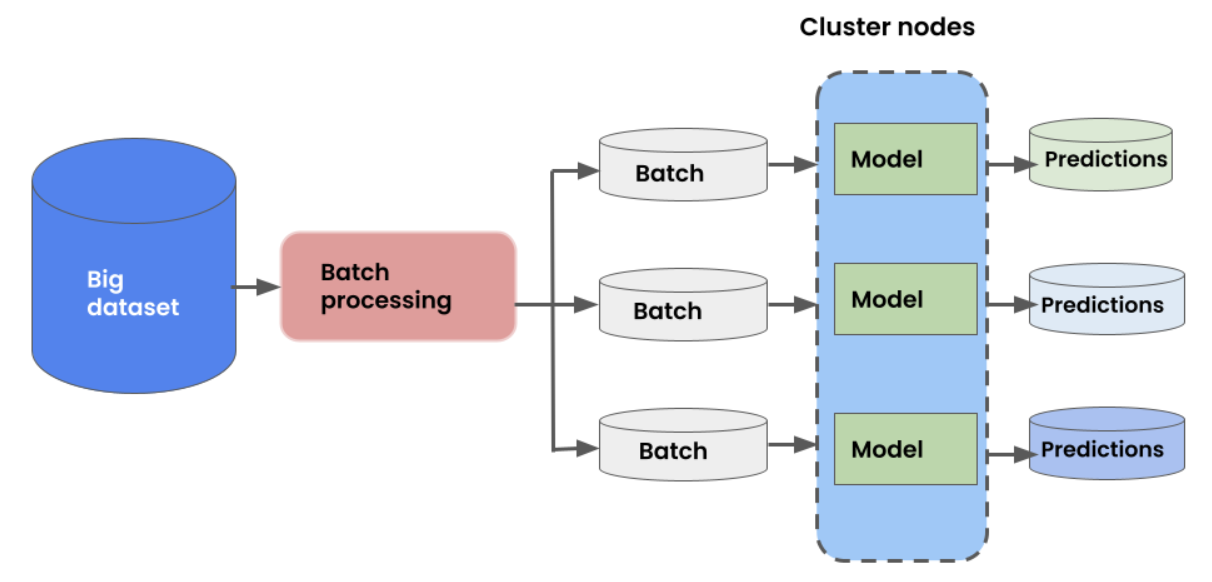

- ✅ 사용자를 위한 매우 빠른 추론을 위해 예측을 생성하고 캐시합니다.
- ✅ 실시간으로 사용되지 않으므로 모델을 자체 서비스로 스핀업할 필요가 없습니다.
- ❌ 사용자가 현재 예측의 기반이 되는 오래된 데이터에 포착되지 않은 새로운 관심사를 개발하면 예측이 부실해질 수 있습니다.

#### Online inference

또한 예측을 검색하기 위해 입력 기능이 모델에 공급되는 실시간 예측을 제공할 수도 있습니다. 
이 시나리오에서는 들어오는 요청을 처리할 수 있는 별도의 서비스(예: API 엔드포인트)로 모델을 제공해야 합니다.

- ✅ 보다 의미 있는 사용자 경험을 제공할 수 있는 보다 최신의 예측 결과를 얻을 수 있습니다.
- ❌ 요청 트래픽을 처리하기 위해 관리형 마이크로서비스가 필요합니다.
- ❌ 입력 공간이 제한되지 않아 잘못된 예측이 나올 수 있으므로 실시간 모니터링이 필요합니다.

우리의 과제:

이 작업에서는 실시간 요청을 처리하기 위해 모델을 별도의 서비스로 제공할 것입니다.  
우리는 온라인 추론을 수행하여 ML 콘텐츠가 제공될 때 신속하게 분류할 수 있기를 원합니다.  
하지만 완성도를 높이기 위해 일괄 추론을 수행하는 방법도 시연할 예정입니다.

### Feedback

시스템에 대한 피드백을 어떻게 받아 다음 반복 작업에 반영하나요?  
여기에는 사람에 의한 피드백뿐만 아니라 모니터링 등을 통한 자동 피드백이 모두 포함될 수 있습니다.

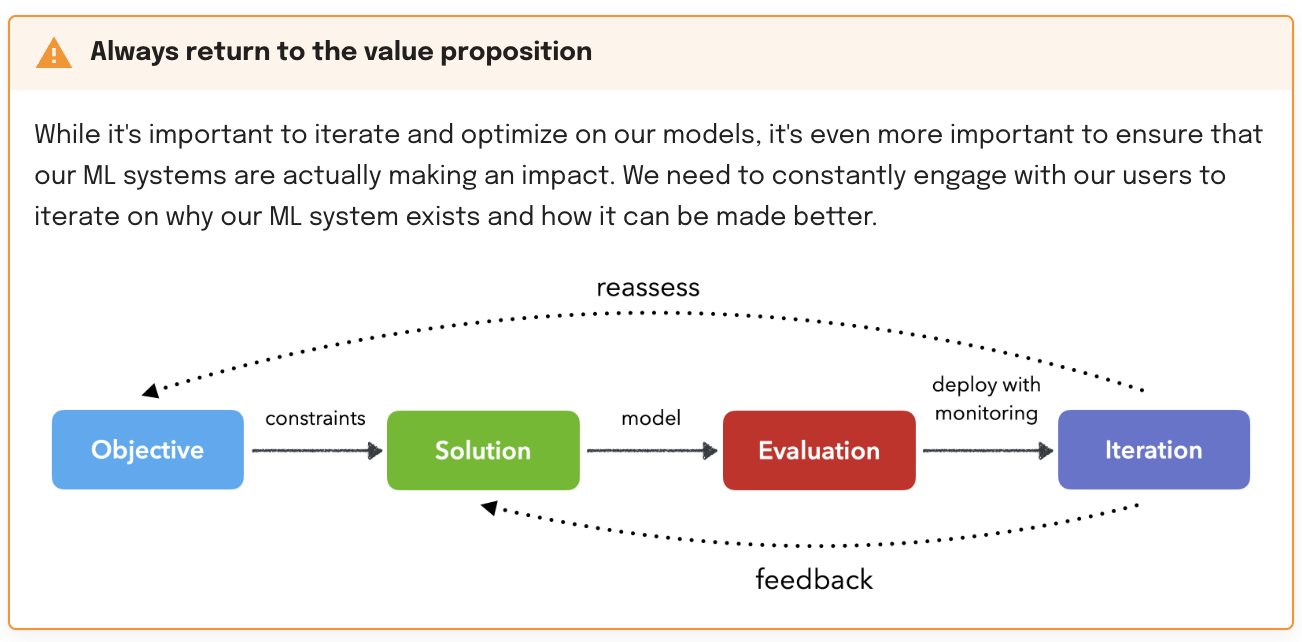